In [1]:
import matplotlib.pyplot as plt
import json, os
import pandas as pd

In [2]:
from pathlib import Path

def list_files(directory, ext='h5'):
    return [str(file) for file in Path(directory).rglob(f"*.{ext}")]

In [59]:
stat_keys = ['total_execution_time (seconds)', 'total_process_memory (MB)', 'throughput_bps', 'sample_persec']

def get_stats(root):
    results = {
        key: [] for key in stat_keys
    }

    for run in range(1, 2):

        subroot = os.path.join(root, str(run))
        filenames = list_files(subroot, 'json')
        if len(filenames) ==0: continue

        for filename in filenames:
            with open(filename, 'r') as input:
                data = json.load(input)

                file_results = {key: 0 for key in results.keys()}
                files_no_per_worker = len(data)
                if files_no_per_worker == 0:
                    continue

                for file_stat in data:
                    for key in results.keys():

                        file_results[key] += file_stat['stats'][key] if key != 'sample_persec' else file_stat['stats'][key][0] 

                for key in file_results.keys():
                    value = file_results[key]
                    # if key in ['total_execution_time (seconds)']:
                    #     results[key].append(value)
                    # else: 
                    results[key].append(value / files_no_per_worker)

    df = pd.DataFrame(results)
    return df

In [60]:
df_96 = get_stats(root = 'results/100GB_96')
df_128 = get_stats(root = 'results/100GB_128')
df_256 = get_stats(root = 'results/100GB_256')
df_512 = get_stats(root = 'results/100GB_512')

In [61]:
results = {
    '96': df_96, '128': df_128, '256': df_256, '512': df_512
}

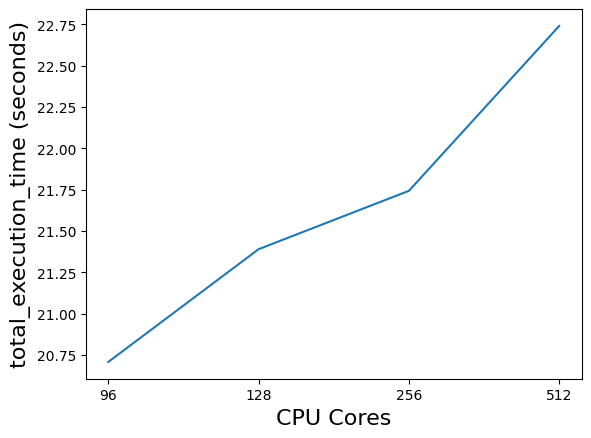

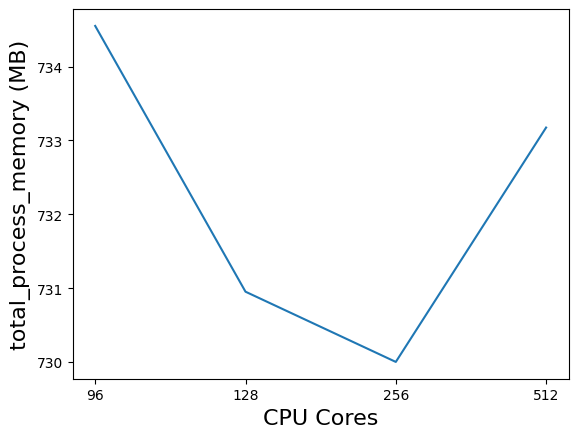

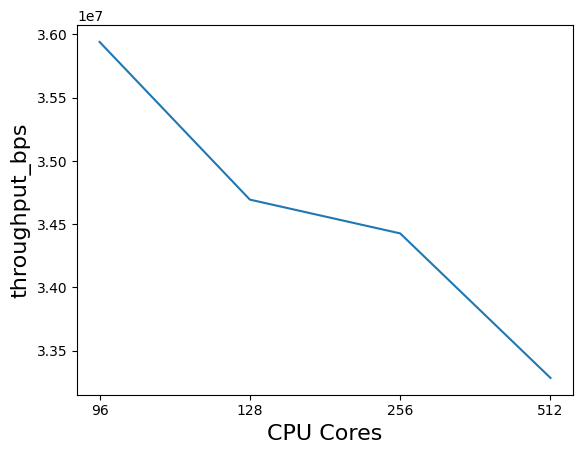

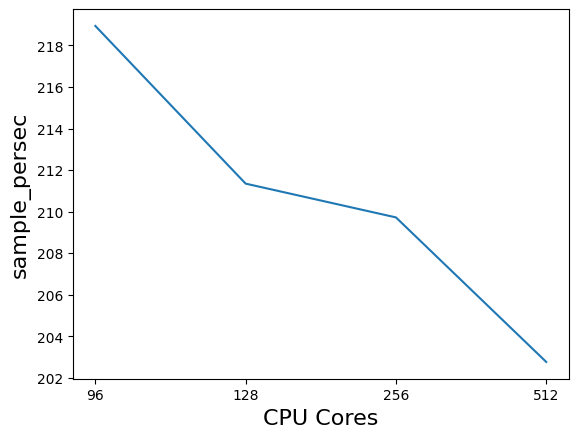

In [64]:
for stat_key in stat_keys:
    x = []
    y = []
    for key in results:
        x.append(key)
        y.append(results[key][stat_key].mean())

    plt.plot(x, y)
    plt.xlabel('CPU Cores', fontsize=16)
    plt.ylabel(stat_key, fontsize=16)
    plt.savefig(f'./results/figures/{stat_key}.jpg', bbox_inches='tight')
    plt.show()

In [ ]:
df = pd.read_csv('./results/total_execution_time.csv')
df = df[df['data(GB)']==100] # 100GB

In [74]:
df.groupby('run')['duration']

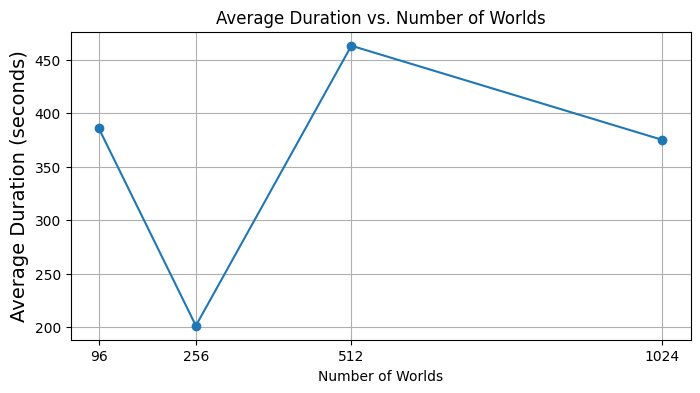

In [84]:
df['duration_seconds'] = pd.to_timedelta(df['duration']).dt.total_seconds()

# Calculate average duration for each num_worlds
avg_duration = df.groupby('num_worlds')['duration_seconds'].mean().reset_index()


# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(avg_duration['num_worlds'], avg_duration['duration_seconds'], marker='o')
plt.xlabel('Number of Worlds')
plt.xticks(avg_duration['num_worlds'])
plt.ylabel('Average Duration (seconds)', fontsize=14)
plt.title('Average Duration vs. Number of Worlds')
plt.grid(True)
plt.savefig(f'./results/figures/avg_duration.jpg', bbox_inches='tight')

In [77]:
df['duration'].split('0:00:46')

AttributeError: 'Series' object has no attribute 'split'

In [57]:
# plt.plot(df['data'], df['total_execution_time (seconds)'])
# plt.xlabel('Data (GB)', fontsize=16)
# plt.ylabel('Inference Time (seconds)', fontsize=16)
# # plt.savefig(f'./outputs/{device}.jpg', bbox_inches='tight')
# plt.show()